In [101]:
#DS imports
import pandas as pd
import numpy as np

from requests import get
from bs4 import BeautifulSoup
import os
import json
from typing import Dict, List, Optional, Union, cast
import requests
import re
import time
import unicodedata
import markdown
import nltk
from sklearn.model_selection import train_test_split

#Visualization
import seaborn as sns
import matplotlib as plt
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt
from PIL import Image

from env import github_token, github_username
from importlib import reload
import explore as e
import prepare as p

# Acquire

In [2]:
"""
A module for obtaining repo readme and language data from the github API.
Before using this module, read through it, and follow the instructions marked
TODO.
After doing so, run it like this:
    python acquire.py
To create the `data.json` file that contains the data.
"""

# TODO: Make a github personal access token.
#     1. Go here and generate a personal access token: https://github.com/settings/tokens
#        You do _not_ need select any scopes, i.e. leave all the checkboxes unchecked
#     2. Save it in your env.py file under the variable `github_token`
# TODO: Add your github username to your env.py file under the variable `github_username`
# TODO: Add more repositories to the `REPOS` list below.

REPOS = [
    "gocodeup/codeup-setup-script",
    "gocodeup/movies-application",
    "torvalds/linux",
]

headers = {"Authorization": f"token {github_token}", "User-Agent": github_username}

if headers["Authorization"] == "token " or headers["User-Agent"] == "":
    raise Exception(
        "You need to follow the instructions marked TODO in this script before trying to use it"
    )


def github_api_request(url: str) -> Union[List, Dict]:
    response = requests.get(url, headers=headers)
    response_data = response.json()
    if response.status_code != 200:
        raise Exception(
            f"Error response from github api! status code: {response.status_code}, "
            f"response: {json.dumps(response_data)}"
        )
    return response_data


def get_repo_language(repo: str) -> str:
    url = f"https://api.github.com/repos/{repo}"
    repo_info = github_api_request(url)
    if type(repo_info) is dict:
        repo_info = cast(Dict, repo_info)
        if "language" not in repo_info:
            raise Exception(
                "'language' key not round in response\n{}".format(json.dumps(repo_info))
            )
        return repo_info["language"]
    raise Exception(
        f"Expecting a dictionary response from {url}, instead got {json.dumps(repo_info)}"
    )


def get_repo_contents(repo: str) -> List[Dict[str, str]]:
    url = f"https://api.github.com/repos/{repo}/contents/"
    contents = github_api_request(url)
    if type(contents) is list:
        contents = cast(List, contents)
        return contents
    raise Exception(
        f"Expecting a list response from {url}, instead got {json.dumps(contents)}"
    )


def get_readme_download_url(files: List[Dict[str, str]]) -> str:
    """
    Takes in a response from the github api that lists the files in a repo and
    returns the url that can be used to download the repo's README file.
    """
    for file in files:
        if file["name"].lower().startswith("readme"):
            return file["download_url"]
    return ""


def process_repo(repo: str) -> Dict[str, str]:
    """
    Takes a repo name like "gocodeup/codeup-setup-script" and returns a
    dictionary with the language of the repo and the readme contents.
    """
    contents = get_repo_contents(repo)
    readme_download_url = get_readme_download_url(contents)
    if readme_download_url == "":
        readme_contents = ""
    else:
        readme_contents = requests.get(readme_download_url).text
    return {
        "repo": repo,
        "language": get_repo_language(repo),
        "readme_contents": readme_contents,
    }


def scrape_github_data() -> List[Dict[str, str]]:
    """
    Loop through all of the repos and process them. Returns the processed data.
    """
    return [process_repo(repo) for repo in REPOS]


if __name__ == "__main__":
    data = scrape_github_data()
    json.dump(data, open("data.json", "w"), indent=1)

In [4]:
#url = "https://github.com/topics/minecraft"
reqs = requests.get(url)
soup = BeautifulSoup(reqs.text, 'html.parser')
urls = []
for link in soup.find_all('a',class_="v-align-middle"):
    print(link.get('href'))

In [ ]:
soup.find_all('div', class_="d-flex flex-1")

In [21]:
list_of_div_elements = soup.find_all('a', class_="data-hydro-click")
list_of_div_elements

[]

In [42]:
s = soup.find_all('h3', class_='f3 color-fg-muted text-normal lh-condensed')

In [54]:
s[0].find('a', class_="text-bold wb-break-word")['href']

'fogleman/Craft'

In [57]:
links =[]
all_minecraft_repos = soup.find_all('h3', class_='f3 color-fg-muted text-normal lh-condensed')
for each_minecraft_repo in all_minecraft_repos:
    #href_link = each_minecraft_repo.a.attrs["href"]
    href_link = each_minecraft_repo.find('a', class_="text-bold wb-break-word")['href'][1:]
    links.append(href_link)

In [58]:
links

['fogleman/Craft',
 'dnschneid/crouton',
 'PaperMC/Paper',
 'IdreesInc/Monocraft',
 'MinecraftForge/MinecraftForge',
 'nuno-faria/tiler',
 'cabaletta/baritone',
 'huanghongxun/HMCL',
 'cuberite/cuberite',
 'CaffeineMC/sodium-fabric',
 'MultiMC/Launcher',
 'GeyserMC/Geyser',
 'PojavLauncherTeam/PojavLauncher',
 'PrismarineJS/mineflayer',
 'pmmp/PocketMine-MP',
 'PrismLauncher/PrismLauncher',
 'EngineHub/WorldEdit',
 'IrisShaders/Iris',
 'feather-rs/feather',
 'Querz/mcaselector']

In [60]:
soup.find_all('a', class_="v-align-middle")

[]

In [92]:
url = 'https://github.com/search?3&q=minecraft&type=Repositories'

In [93]:
url

'https://github.com/search?3&q=minecraft&type=Repositories'

In [94]:
def get_minecraft_urls(url):
    reqs = requests.get(url)
    soup = BeautifulSoup(reqs.text, 'html.parser')
    urls = []
    for link in soup.find_all('a',class_="v-align-middle"):
        urls.append(link.get('href'))
    return urls

In [95]:
urls = get_minecraft_urls(url)
urls

['/MinecraftForge/MinecraftForge',
 '/fogleman/Minecraft',
 '/itzg/docker-minecraft-server',
 '/overviewer/Minecraft-Overviewer',
 '/TheGreyGhost/MinecraftByExample',
 '/minecraft-dev/MinecraftDev',
 '/jdah/minecraft-weekend',
 '/mouse0w0/MinecraftDeveloperGuide',
 '/Bukkit/Bukkit',
 '/TheRemote/MinecraftBedrockServer']

In [75]:
df_url = pd.DataFrame(urls, columns=['urls'])

In [77]:
#turn to csv
df_url.to_csv('df_urls.csv')

In [98]:
for i in range(3,53):
    url = f'https://github.com/search?{i}&q=minecraft&type=Repositories'
    url_list = []
    urls = get_minecraft_urls(url)
    url_list.append(urls)

In [100]:
url_list

[[]]

In [115]:
df.head()

,url
3,TheRemote/MinecraftBedrockServer
4,TheRemote/MinecraftBedrockServer


In [111]:
len(urls)

20

In [137]:
urls = []
for i in range(1,152):
    url = f'https://github.com/search?p={i}&q=minecraft&type=Repositories'
    reqs = requests.get(url)
    soup = BeautifulSoup(reqs.text, 'html.parser')
    time.sleep(5)
    
    for link in soup.find_all('a',class_="v-align-middle"):
        hyperlink = re.sub(r'/','', link.get('href'), count = 1)
        urls.append(hyperlink)
        time.sleep(1)

In [139]:
len(urls)

560

In [130]:
urls

['PrismarineJS/node-minecraft-protocol',
 'SpongePowered/SpongeAPI',
 'PrismarineJS/minecraft-data',
 'xPaw/PHP-Minecraft-Query',
 'samhogan/Minecraft-Unity3D',
 'GeyserMC/Geyser',
 'Hawstein/PyMinecraft',
 'jkutner/heroku-buildpack-minecraft',
 'walterhiggins/ScriptCraft',
 'doctorray117/minecraft-ondemand',
 'Ahtenus/minecraft-init',
 'Pierce01/MinecraftLauncher-core',
 'itzg/docker-minecraft-bedrock-server',
 'itsFrank/MinecraftHDL',
 'docker-archive/minecraft',
 'ldtteam/minecolonies',
 'YouHaveTrouble/minecraft-optimization',
 'dan200/ComputerCraft',
 'smith-j-travis/MinecraftAutoClicker',
 'toolbox4minecraft/amidst',
 'ReplayMod/ReplayMod',
 'pdinklag/MinecraftStats',
 'Wurst-Imperium/Wurst7',
 'MultiMC/Launcher',
 'pmmp/PocketMine-MP',
 'jdah/minecraft-again',
 'clear-code-projects/Minecraft-in-Python',
 'danba340/minecraft-freecodecamp',
 'LuckPerms/LuckPerms',
 'Advanced-Rocketry/AdvancedRocketry',
 'Minecraft-in-python/Minecraft',
 'overshard/docker-minecraft',
 'Fenixin/Mine

In [140]:
df2 = pd.DataFrame(columns=['repo_link'])
for i in range(len(urls)):
    df2.loc[i] = urls[i]

In [141]:
df2['repo_link'].nunique(), df.shape[0]

(556, 300)

In [6]:
#df = pd.read_csv(r'df_urls.csv', index_col=[0])

In [7]:
#df

,urls
0,/MinecraftForge/MinecraftForge
1,/fogleman/Minecraft
2,/itzg/docker-minecraft-server
3,/overviewer/Minecraft-Overviewer
4,/TheGreyGhost/MinecraftByExample
5,/minecraft-dev/MinecraftDev
6,/jdah/minecraft-weekend
7,/mouse0w0/MinecraftDeveloperGuide
8,/Bukkit/Bukkit
9,/TheRemote/MinecraftBedrockServer


In [3]:
url = f'https://github.com/search?q=minecraft'

In [8]:
df['urls'] = df['urls'].str.replace('/','',n=1)
df

,urls
0,MinecraftForge/MinecraftForge
1,fogleman/Minecraft
2,itzg/docker-minecraft-server
3,overviewer/Minecraft-Overviewer
4,TheGreyGhost/MinecraftByExample
5,minecraft-dev/MinecraftDev
6,jdah/minecraft-weekend
7,mouse0w0/MinecraftDeveloperGuide
8,Bukkit/Bukkit
9,TheRemote/MinecraftBedrockServer


In [9]:
"""
A module for obtaining repo readme and language data from the github API.
Before using this module, read through it, and follow the instructions marked
TODO.
After doing so, run it like this:
    python acquire.py
To create the `data.json` file that contains the data.
"""

# TODO: Make a github personal access token.
#     1. Go here and generate a personal access token: https://github.com/settings/tokens
#        You do _not_ need select any scopes, i.e. leave all the checkboxes unchecked
#     2. Save it in your env.py file under the variable `github_token`
# TODO: Add your github username to your env.py file under the variable `github_username`
# TODO: Add more repositories to the `REPOS` list below.

REPOS = list(df['urls'])

headers = {"Authorization": f"token {github_token}", "User-Agent": github_username}

if headers["Authorization"] == "token " or headers["User-Agent"] == "":
    raise Exception(
        "You need to follow the instructions marked TODO in this script before trying to use it"
    )


def github_api_request(url: str) -> Union[List, Dict]:
    response = requests.get(url, headers=headers)
    response_data = response.json()
    if response.status_code != 200:
        raise Exception(
            f"Error response from github api! status code: {response.status_code}, "
            f"response: {json.dumps(response_data)}"
        )
    return response_data


def get_repo_language(repo: str) -> str:
    url = f"https://api.github.com/repos/{repo}"
    repo_info = github_api_request(url)
    if type(repo_info) is dict:
        repo_info = cast(Dict, repo_info)
        if "language" not in repo_info:
            raise Exception(
                "'language' key not round in response\n{}".format(json.dumps(repo_info))
            )
        return repo_info["language"]
    raise Exception(
        f"Expecting a dictionary response from {url}, instead got {json.dumps(repo_info)}"
    )


def get_repo_contents(repo: str) -> List[Dict[str, str]]:
    url = f"https://api.github.com/repos/{repo}/contents/"
    contents = github_api_request(url)
    if type(contents) is list:
        contents = cast(List, contents)
        return contents
    raise Exception(
        f"Expecting a list response from {url}, instead got {json.dumps(contents)}"
    )


def get_readme_download_url(files: List[Dict[str, str]]) -> str:
    """
    Takes in a response from the github api that lists the files in a repo and
    returns the url that can be used to download the repo's README file.
    """
    for file in files:
        if file["name"].lower().startswith("readme"):
            return file["download_url"]
    return ""


def process_repo(repo: str) -> Dict[str, str]:
    """
    Takes a repo name like "gocodeup/codeup-setup-script" and returns a
    dictionary with the language of the repo and the readme contents.
    """
    contents = get_repo_contents(repo)
    readme_download_url = get_readme_download_url(contents)
    if readme_download_url == "":
        readme_contents = ""
    else:
        readme_contents = requests.get(readme_download_url).text
    return {
        "repo": repo,
        "language": get_repo_language(repo),
        "readme_contents": readme_contents,
    }


def scrape_github_data() -> List[Dict[str, str]]:
    """
    Loop through all of the repos and process them. Returns the processed data.
    """
    return [process_repo(repo) for repo in REPOS]


if __name__ == "__main__":
    data = scrape_github_data()
    json.dump(data, open("data.json", "w"), indent=1)

In [11]:
scraped_dict = scrape_github_data()

In [13]:
scraped_df = pd.DataFrame(scraped_dict)
scraped_df

,repo,language,readme_contents
0,MinecraftForge/MinecraftForge,Java,
1,fogleman/Minecraft,Python,# Minecraft\n\nSimple Minecraft-inspired demo ...
2,itzg/docker-minecraft-server,Shell,[![Docker Pulls](https://img.shields.io/docker...
3,overviewer/Minecraft-Overviewer,Python,====================================\nMinecraf...
4,TheGreyGhost/MinecraftByExample,Java,MinecraftByExample [1.16.4]\n=================...
5,minecraft-dev/MinecraftDev,Kotlin,"<p align=""center""><a href=""https://minecraftde..."
6,jdah/minecraft-weekend,C,"# Minecraft, but I made it in 48 hours*\n\n\* ..."
7,mouse0w0/MinecraftDeveloperGuide,None,# 我的世界开发者中文指南\n![](https://img.shields.io/badg...
8,Bukkit/Bukkit,Java,Bukkit\n======\n\nA Minecraft Server API.\n\nW...
9,TheRemote/MinecraftBedrockServer,Shell,# Minecraft Bedrock Server\n\n[日本語版 README はこち...


In [17]:
df = pd.read_csv(r'scraped_data.csv', index_col=[0])
df

,repo,language,readme_contents
0,MinecraftForge/MinecraftForge,Java,NaN
1,fogleman/Minecraft,Python,# Minecraft\n\nSimple Minecraft-inspired demo ...
2,itzg/docker-minecraft-server,Shell,[![Docker Pulls](https://img.shields.io/docker...
3,overviewer/Minecraft-Overviewer,Python,====================================\nMinecraf...
4,TheGreyGhost/MinecraftByExample,Java,MinecraftByExample [1.16.4]\n=================...
...,...,...,...
495,GoLangMc/minecraft-server,Go,"\n<p align=""center"">\n\n <a href=""https://git..."
496,Poudingue/Vanilla-Normals-Renewed-1.12,NaN,# Vanilla-Normals-Renewed-1.12\n\nThis is an a...
497,NiclasOlofsson/MiNET,C#,In case you don't find the information you are...
498,manicdigger/manicdigger,C#,[![Travis Build Status](https://img.shields.io...


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 1 to 499
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             440 non-null    object
 1   language         440 non-null    object
 2   readme_contents  440 non-null    object
dtypes: object(3)
memory usage: 13.8+ KB


In [26]:
df = df.dropna()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 1 to 499
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             440 non-null    object
 1   language         440 non-null    object
 2   readme_contents  440 non-null    object
dtypes: object(3)
memory usage: 13.8+ KB


In [28]:
df.language.value_counts()

Java                198
Python               41
JavaScript           36
C#                   26
PHP                  18
Shell                18
C++                  17
C                    12
Kotlin               11
TypeScript           11
Go                    9
Rust                  8
Lua                   4
Batchfile             3
Scala                 3
HCL                   2
HTML                  2
CoffeeScript          2
Dockerfile            2
Ruby                  2
TeX                   2
Jupyter Notebook      2
mcfunction            1
Assembly              1
Yacc                  1
Mustache              1
Smarty                1
PureBasic             1
Clojure               1
CSS                   1
PowerShell            1
SystemVerilog         1
ZenScript             1
Name: language, dtype: int64

In [30]:
df.head(51:101)

SyntaxError: invalid syntax (3406975882.py, line 1)

In [33]:
language_list = ['Java','Python','JavaScript']

In [34]:
df = df[df.language.isin(language_list) == True]

In [36]:
df.language.value_counts()

Java          198
Python         41
JavaScript     36
Name: language, dtype: int64

In [37]:
def remove_languages(df):
    #define values
    language_list = ['Java','Python','JavaScript']
    #drop rows that contain any value in the list
    df = df[df.language.isin(language_list) == True]
    
    return df

# Prepare

In [2]:
df = pd.read_csv(r'large_scraped_data.csv', index_col=[0])
df

,repo,language,readme_contents
1,fogleman/Minecraft,Python,# Minecraft\n\nSimple Minecraft-inspired demo ...
2,itzg/docker-minecraft-server,Shell,[![Docker Pulls](https://img.shields.io/docker...
3,overviewer/Minecraft-Overviewer,Python,====================================\nMinecraf...
4,TheGreyGhost/MinecraftByExample,Java,MinecraftByExample [1.16.4]\n=================...
5,minecraft-dev/MinecraftDev,Kotlin,"<p align=""center""><a href=""https://minecraftde..."
...,...,...,...
994,Crossroads-Development/Crossroads,Java,# Crossroads\n\nA steampunk technology mod for...
995,GeyserMC/PacketLib,Java,# PacketLib\nPacketLib is a library for packet...
996,Nic4Las/Minecraft-Enderite-Mod,Java,# Enderite Mod\n\n[![](http://cf.way2muchnoise...
998,espertus/blockly-lua,JavaScript,Blockly Lua allows you to program ComputerCraf...


In [62]:
# Replace a whitespace sequence or empty with a NaN value and reassign this manipulation to df. 
df = df.replace(r'^\s*$', np.nan, regex=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             1000 non-null   object
 1   language         938 non-null    object
 2   readme_contents  943 non-null    object
dtypes: object(3)
memory usage: 31.2+ KB


In [64]:
# Removes null values
df = df.dropna()

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 1 to 999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             884 non-null    object
 1   language         884 non-null    object
 2   readme_contents  884 non-null    object
dtypes: object(3)
memory usage: 27.6+ KB


In [66]:
df.language.value_counts()

Java                 402
JavaScript            86
Python                76
C#                    43
C++                   36
Shell                 35
PHP                   33
Kotlin                23
TypeScript            22
Go                    19
C                     16
Rust                  15
Lua                    6
HTML                   6
ZenScript              5
Ruby                   5
CSS                    4
GLSL                   4
Dockerfile             4
Scala                  4
Jupyter Notebook       4
Batchfile              3
CoffeeScript           3
HCL                    3
Elixir                 2
mcfunction             2
Visual Basic .NET      2
TeX                    2
Mustache               2
PowerShell             2
GDScript               1
R                      1
CMake                  1
Vue                    1
AutoHotkey             1
SCSS                   1
PureBasic              1
Swift                  1
JSON                   1
Assembly               1


In [67]:
#Lowercase everything
df['readme_contents'] = df['readme_contents'].str.lower()

In [68]:
df.head(2)

,repo,language,readme_contents
1,fogleman/Minecraft,Python,# minecraft\n\nsimple minecraft-inspired demo ...
2,itzg/docker-minecraft-server,Shell,[![docker pulls](https://img.shields.io/docker...


In [69]:
#df['readme_contents'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

1      # minecraft\n\nsimple minecraft-inspired demo ...
2      [![docker pulls](https://img.shields.io/docker...
3      ====================================\nminecraf...
4      minecraftbyexample [1.16.4]\n=================...
5      <p align="center"><a href="https://minecraftde...
                             ...                        
994    # crossroads\n\na steampunk technology mod for...
995    # packetlib\npacketlib is a library for packet...
996    # enderite mod\n\n[![](http://cf.way2muchnoise...
998    blockly lua allows you to program computercraf...
999    # node-minecraft-ping\n\nsends a [server list ...
Name: readme_contents, Length: 884, dtype: object

In [71]:
df.head(2)

,repo,language,readme_contents
1,fogleman/Minecraft,Python,# minecraft\n\nsimple minecraft-inspired demo ...
2,itzg/docker-minecraft-server,Shell,[![docker pulls](https://img.shields.io/docker...


In [72]:
#df['readme_plain'] = 
df['readme_contents'].apply(lambda x: markdown.markdown(x))

1      <h1>minecraft</h1>\n<p>simple minecraft-inspir...
2      <p><a href="https://hub.docker.com/r/itzg/mine...
3      <p>====================================\nminec...
4      <h1>minecraftbyexample [1.16.4]</h1>\n<p>the p...
5      <p align="center"><a href="https://minecraftde...
                             ...                        
994    <h1>crossroads</h1>\n<p>a steampunk technology...
995    <h1>packetlib</h1>\n<p>packetlib is a library ...
996    <h1>enderite mod</h1>\n<p><a href="https://www...
998    <p>blockly lua allows you to program computerc...
999    <h1>node-minecraft-ping</h1>\n<p>sends a <a hr...
Name: readme_contents, Length: 884, dtype: object

# Explore

In [3]:
#Basic clean removes ASCII characters

In [201]:
reload(p)

<module 'prepare' from '/Users/crislucin/codeup-data-science/MinecraftNLP/prepare.py'>

In [202]:
df = pd.read_csv(r'clean_scraped_data.csv', index_col=[0])
df.head()

,repo,language,readme_contents,clean,lemmatized
1,fogleman/Minecraft,Python,# Minecraft\n\nSimple Minecraft-inspired demo ...,minecraft simple minecraftinspired demo writte...,minecraft simple minecraftinspired demo writte...
2,itzg/docker-minecraft-server,Shell,[![Docker Pulls](https://img.shields.io/docker...,docker pullshttpsimgshieldsiodockerpullsitzgmi...,docker pullshttpsimgshieldsiodockerpullsitzgmi...
3,overviewer/Minecraft-Overviewer,Python,====================================\nMinecraf...,minecraft overviewer build status andrew brown...,minecraft overviewer build status andrew brown...
4,TheGreyGhost/MinecraftByExample,Java,MinecraftByExample [1.16.4]\n=================...,minecraftbyexample 1164 purpose minecraftbyexa...,minecraftbyexample 1164 purpose minecraftbyexa...
5,minecraft-dev/MinecraftDev,Kotlin,"<p align=""center""><a href=""https://minecraftde...",p aligncentera hrefhttpsminecraftdevorgimg src...,p aligncentera hrefhttpsminecraftdevorgimg src...


In [206]:
extra_stops = ['server', 'run', '&#9;', "' ", " '", "'",'Minecraft','minecraft','minecraft ',' minecraft', 'abstract','and','arguments','assert','break','byte','case','char','class',
               'const','continue','default','double','else','enum','extends','false','final','finally','float','for',
               'goto','if','implements','import','in','instanceof','int','interface','long','native','new','null',
               'package','pass','private','protected','public','raise','return','short','static','super','switch',
               'synchronized','this','throw','throws','transient','true','try','void','volatile','while','with',
               'yield', 'http', 'com', 'github', 'www', 'version', 'file']

In [207]:
df = p.prep_readme_data(df, 'readme_contents', extra_words=extra_stops)
df.head()

Removed 151 stopwords
---
Removed 4745 stopwords
---
Removed 207 stopwords
---
Removed 505 stopwords
---
Removed 155 stopwords
---
Removed 76 stopwords
---
Removed 9 stopwords
---
Removed 1439 stopwords
---
Removed 208 stopwords
---
Removed 35 stopwords
---
Removed 336 stopwords
---
Removed 222 stopwords
---
Removed 243 stopwords
---
Removed 257 stopwords
---
Removed 177 stopwords
---
Removed 222 stopwords
---
Removed 102 stopwords
---
Removed 73 stopwords
---
Removed 204 stopwords
---
Removed 231 stopwords
---
Removed 10 stopwords
---
Removed 136 stopwords
---
Removed 13 stopwords
---
Removed 211 stopwords
---
Removed 676 stopwords
---
Removed 2218 stopwords
---
Removed 132 stopwords
---
Removed 585 stopwords
---
Removed 681 stopwords
---
Removed 206 stopwords
---
Removed 704 stopwords
---
Removed 130 stopwords
---
Removed 70 stopwords
---
Removed 117 stopwords
---
Removed 256 stopwords
---
Removed 1172 stopwords
---
Removed 128 stopwords
---
Removed 215 stopwords
---
Removed 74 stopw

,repo,language,readme_contents,clean,lemmatized
1,fogleman/Minecraft,Python,# Minecraft\n\nSimple Minecraft-inspired demo ...,simple minecraftinspired demo written python p...,simple minecraftinspired demo written python p...
2,itzg/docker-minecraft-server,Other,[![Docker Pulls](https://img.shields.io/docker...,docker pullshttpsimgshieldsiodockerpullsitzgmi...,docker pullshttpsimgshieldsiodockerpullsitzgmi...
3,overviewer/Minecraft-Overviewer,Python,====================================\nMinecraf...,overviewer build status andrew brown contribut...,overviewer build status andrew brown contribut...
4,TheGreyGhost/MinecraftByExample,Java,MinecraftByExample [1.16.4]\n=================...,minecraftbyexample 1164 purpose minecraftbyexa...,minecraftbyexample 1164 purpose minecraftbyexa...
5,minecraft-dev/MinecraftDev,Other,"<p align=""center""><a href=""https://minecraftde...",p aligncentera hrefhttpsminecraftdevorgimg src...,p aligncentera hrefhttpsminecraftdevorgimg src...


In [208]:
df.head(2)

,repo,language,readme_contents,clean,lemmatized
1,fogleman/Minecraft,Python,# Minecraft\n\nSimple Minecraft-inspired demo ...,simple minecraftinspired demo written python p...,simple minecraftinspired demo written python p...
2,itzg/docker-minecraft-server,Other,[![Docker Pulls](https://img.shields.io/docker...,docker pullshttpsimgshieldsiodockerpullsitzgmi...,docker pullshttpsimgshieldsiodockerpullsitzgmi...


In [209]:
#map_other_languages(df):
df = p.map_other_languages(df)
df.head()

,repo,language,readme_contents,clean,lemmatized
1,fogleman/Minecraft,Python,# Minecraft\n\nSimple Minecraft-inspired demo ...,simple minecraftinspired demo written python p...,simple minecraftinspired demo written python p...
2,itzg/docker-minecraft-server,Other,[![Docker Pulls](https://img.shields.io/docker...,docker pullshttpsimgshieldsiodockerpullsitzgmi...,docker pullshttpsimgshieldsiodockerpullsitzgmi...
3,overviewer/Minecraft-Overviewer,Python,====================================\nMinecraf...,overviewer build status andrew brown contribut...,overviewer build status andrew brown contribut...
4,TheGreyGhost/MinecraftByExample,Java,MinecraftByExample [1.16.4]\n=================...,minecraftbyexample 1164 purpose minecraftbyexa...,minecraftbyexample 1164 purpose minecraftbyexa...
5,minecraft-dev/MinecraftDev,Other,"<p align=""center""><a href=""https://minecraftde...",p aligncentera hrefhttpsminecraftdevorgimg src...,p aligncentera hrefhttpsminecraftdevorgimg src...


In [160]:
# #Function in prepare does this
# top_languages = ["Python", "Java", "JavaScript"]
# df.loc[~df['language'].isin(top_languages), 'language'] = 'Other'

In [210]:
def split_minecraft_data(df):
    '''
    This function performs split on minecraft repo data, stratified on language.
    Returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.language)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.language)
    return train, validate, test

#call it with: train, validate, test = split_minecraft_data(df)

In [211]:
train, validate, test = split_minecraft_data(df)

In [212]:
print(len(train)), print(len(test)), print(len(validate))

494
177
213


(None, None, None)

In [213]:
train.head(2)

,repo,language,readme_contents,clean,lemmatized
47,danba340/minecraft-freecodecamp,JavaScript,# Welcome to React three fiber Minecraft\n\nTh...,welcome react three fiber project trying mimic...,welcome react three fiber project trying mimic...
822,BentoBoxWorld/AOneBlock,Java,"# AOneBlock\nA OneBlock Minecraft plugin, writ...",aoneblock oneblock plugin written tastybento c...,aoneblock oneblock plugin written tastybento c...


In [214]:
def show_counts_and_ratios(train, column):
    """
    Takes in a dataframe and a string of a single column
    Returns a dataframe with absolute value counts and percentage value counts
    """
    labels = pd.concat([df[column].value_counts(),
                    df[column].value_counts(normalize=True)], axis=1)
    labels.columns = ['n', 'percent']
    labels
    return labels

show_counts_and_ratios(train, "language")

,n,percent
Java,402,0.454751
Other,320,0.361991
JavaScript,86,0.097285
Python,76,0.085973


In [216]:
def get_language_freq(train):
    '''
    This function takes in the training data set and creates a countplot
    utilizing Seaborn to visualize the range and values of programming
    languages in GitHub Repositories'''
    sns.set_style("darkgrid")
    fig, axes = plt.subplots(figsize=(9, 6))
    cpt = sns.countplot(x='language', data=train, palette='GnBu')
    plt.title('Java is the Most Common Language in our Dataset')
    plt.xlabel("Programming Language")
    plt.ylabel('Count of Languages')
    for tick in axes.xaxis.get_major_ticks():
        tick.label1.set_fontsize(10)
    plt.show()

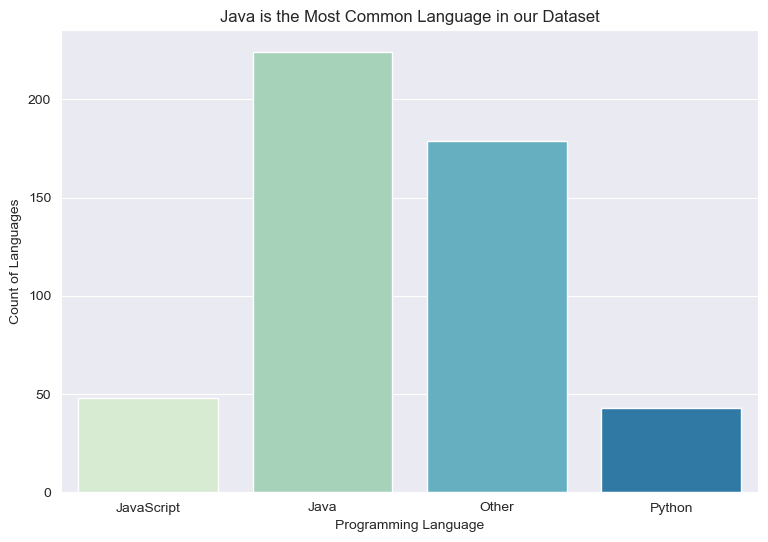

In [217]:
e.get_language_freq(train)

In [218]:
def get_wordcount_bar(train):
    #Make a column on the df for word count
    train['word_count'] = train.lemmatized.str.split().apply(len)
    #Use groupby to get an average length per language
    language_wordcount = train.groupby('language').word_count.mean().sort_values(ascending=False)
    #Set style, make a chart
    sns.set_style("darkgrid")
    fig, axes = plt.subplots(figsize=(9, 6))
    ax = sns.barplot(x=language_wordcount.values, 
                 y=language_wordcount.index, palette='Set3')
    plt.title('Average Wordcount of Languages in Readme Files')
    plt.xlabel("Average Word Count")
    plt.ylabel('Language')
    plt.show()

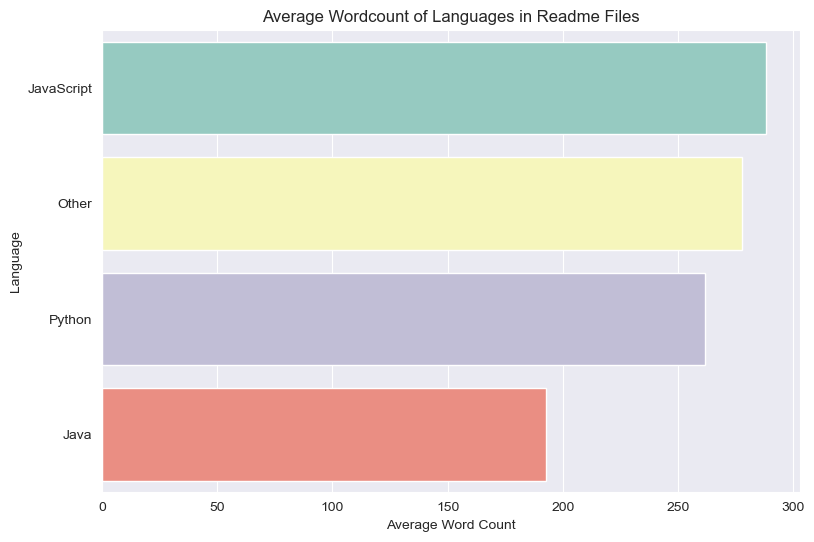

In [219]:
e.get_wordcount_bar(train)

In [175]:
# #Add column for wordcount
# train['word_count'] = train.lemmatized.str.split().apply(len)

In [220]:
language_wordcount = train.groupby('language').word_count.mean().sort_values(ascending=False)
language_wordcount

language
JavaScript    288.416667
Other         277.608939
Python        261.581395
Java          192.500000
Name: word_count, dtype: float64

In [221]:
#Make dataframes by languages
train_java = train[train.language == 'Java']
train_python = train[train.language == 'Python']
train_javascript = train[train.language == 'JavaScript']
train_other = train[train.language == 'Other']

In [222]:
#Make a variable for the series of lemmatized
java_series = train_java['lemmatized']
python_series = train_python['lemmatized']
javascript_series = train_javascript['lemmatized']
other_series = train_other['lemmatized']

In [223]:
#Make an empty list of words
java_words = []
python_words = []
javascript_words = []
other_words = []

In [224]:
#iterating through the series
#Java
for i in java_series:
    for word in i.split(): #Splitting the sentence into words
        java_words.append(word) #appending each word to the list
#Python
for i in python_series:
    for word in i.split(): #Splitting the sentence into words
        python_words.append(word) #appending each word to the list

#javascript
for i in javascript_series:
    for word in i.split(): #Splitting the sentence into words
        javascript_words.append(word) #appending each word to the list

#other
for i in other_series:
    for word in i.split(): #Splitting the sentence into words
        other_words.append(word) #appending each word to the list

In [225]:
#Turning into series based on value counts
java_freq = pd.Series(java_words).value_counts()
python_freq = pd.Series(python_words).value_counts()
javascript_freq = pd.Series(javascript_words).value_counts()
other_freq = pd.Series(other_words).value_counts()

In [226]:
print(java_freq.nlargest(30))

mod           525
build         339
use           298
project       245
code          233
player        220
support       194
issue         180
feature       171
command       167
using         164
java          163
forge         162
license       161
make          160
change        160
gradle        159
add           157
source        150
also          148
block         147
want          143
jar           142
1             142
repository    141
see           134
please        131
work          127
2             124
api           124
dtype: int64


### Making a df for all word counts

In [227]:
#Creating string for all
all_python_readme = ' '.join(train_python['lemmatized'])
all_javascript_readme = ' '.join(train_javascript['lemmatized'])
all_java_readme = ' '.join(train_java['lemmatized'])
all_other_readme = ' '.join(train_other['lemmatized'])

In [228]:
all_python_readme

'aternos discord build statushttpstraviscicommekolaosjackaditsvgbranchmasterhttpstraviscicommekolaosjackadit simple tool serve discord bot manage aternos discord aternos discordaternosondiscord getting startedgettingstarted windowsmaclinux x64windowsmaclinuxx64 raspberry pi armraspberrypiarm prerequisitesprerequisites discord commandsdiscordcommands cloud hosting notecloudhostingnote getting started windowsmaclinux x64 1 git clone repository 2 install using either copy paste execute command inside project folder pip install r requirementstxt alternatively create virtual environment using python venv venv source venvbinactivate pip install r requirementstxt 3 setup bot accounthttpsdiscordpyreadthedocsioenlatestdiscordhtml need bot token setting bot 4 execute using command inside project folder python3 botpy note running botpy first time prompted enter aternos account bot token need python3 botpy finish setting information ever need change information edit env directly delete botpy raspb

In [229]:
#Making into a dataframe
word_counts = (pd.concat([java_freq, python_freq, javascript_freq, other_freq], axis=1, sort=True)
                .set_axis(['java', 'python', 'javascript', 'other'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

,java,python,javascript,other
0,13,61,22,70
00,0,0,1,1
0000,1,0,1,1
000000,0,1,0,0
000000105,0,0,0,1


In [230]:
#all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(' '.join(all_words))

In [231]:
#Making df of all languages by count
total_count = (
    pd.concat([java_freq, python_freq, javascript_freq, other_freq], axis=1, sort=True)
    .rename(columns={0: "Java", 1: "Python", 2: "JavaScript", 3: "Other"})
    .fillna(0)
    .apply(lambda col: col.astype(int))
)

In [232]:
total_count

,Java,Python,JavaScript,Other
0,13,61,22,70
00,0,0,1,1
0000,1,0,1,1
000000,0,1,0,0
000000105,0,0,0,1
...,...,...,...,...
zweite,0,0,1,0
zweites,0,0,1,0
zyliqx,0,1,0,0
zzz,0,0,0,2


In [233]:
#python_words.value_counts()
python_topwords = pd.Series(list(python_words)).value_counts().head(20)
python_topwords

install    134
python     122
use         89
world       72
0           61
image       61
chunk       59
using       57
make        56
block       55
map         54
span        51
mod         51
1           50
br          49
pip         48
command     47
player      47
name        47
support     46
dtype: int64

### Bigrams

In [234]:
#all_python_read_me

python_bigrams = nltk.ngrams(all_python_readme.split(), 2)
python_bigrams = pd.Series(list(python_bigrams))

In [235]:
#all_java_read_me

java_bigrams = nltk.ngrams(all_java_readme.split(), 2)
java_bigrams = pd.Series(list(java_bigrams))

In [236]:
#all_javascript_read_me

javascript_bigrams = nltk.ngrams(all_javascript_readme.split(), 2)
javascript_bigrams = pd.Series(list(javascript_bigrams))

In [237]:
#all other read_me
other_bigrams = nltk.ngrams(all_other_readme.split(), 2)
other_bigrams = pd.Series(list(other_bigrams))

### Trigrams

In [238]:
#all_python_read_me

python_trigrams = nltk.ngrams(all_python_readme.split(), 3)
python_trigrams = pd.Series(list(python_trigrams))

In [239]:
#all_java_read_me

java_trigrams = nltk.ngrams(all_java_readme.split(), 3)
java_trigrams = pd.Series(list(python_trigrams))

In [240]:
#all_javascript_read_me

javascript_trigrams = nltk.ngrams(all_javascript_readme.split(), 3)
javascript_trigrams = pd.Series(list(javascript_trigrams))

In [241]:
#all other read_me
other_trigrams = nltk.ngrams(all_other_readme.split(), 3)
other_trigrams = pd.Series(list(other_trigrams))

In [242]:
python_trigrams

0                                (aternos, discord, build)
1        (discord, build, statushttpstraviscicommekolao...
2        (build, statushttpstraviscicommekolaosjackadit...
3        (statushttpstraviscicommekolaosjackaditsvgbran...
4                                    (simple, tool, serve)
                               ...                        
11241      (httpstravisciorgbarneygalequarry, alt, travis)
11242                                    (alt, travis, ci)
11243                                (travis, ci, current)
11244                                 (ci, current, build)
11245                             (current, build, result)
Length: 11246, dtype: object

In [243]:
top_20_python_bigrams = (pd.Series(nltk.ngrams(python_words, 2))
                      .value_counts()
                      .head(20))

In [244]:
top_20_python_bigrams

(pip, install)              36
(0, chunk)                  21
(span, stylefontweight)     15
(chunk, infoskylight)       14
(chunk, infoblocklight)     13
(java, edition)             11
(classsimg, altimageabr)    11
(make, sure)                11
(aptget, install)           10
(sudo, aptget)              10
(player, player)             9
(elevation, tiff)            9
(br, span)                   9
(altimageabr, br)            9
(install, user)              8
(git, clone)                 8
(point, size)                7
(li, li)                     7
(fabulously, optimized)      7
(python, module)             7
dtype: int64

In [245]:
top_20_java_bigrams = (pd.Series(nltk.ngrams(java_words, 2))
                      .value_counts()
                      .head(20))

In [246]:
top_20_javascript_bigrams = (pd.Series(nltk.ngrams(javascript_words, 2))
                      .value_counts()
                      .head(20))

In [247]:
top_20_other_bigrams = (pd.Series(nltk.ngrams(other_words, 2))
                      .value_counts()
                      .head(20))

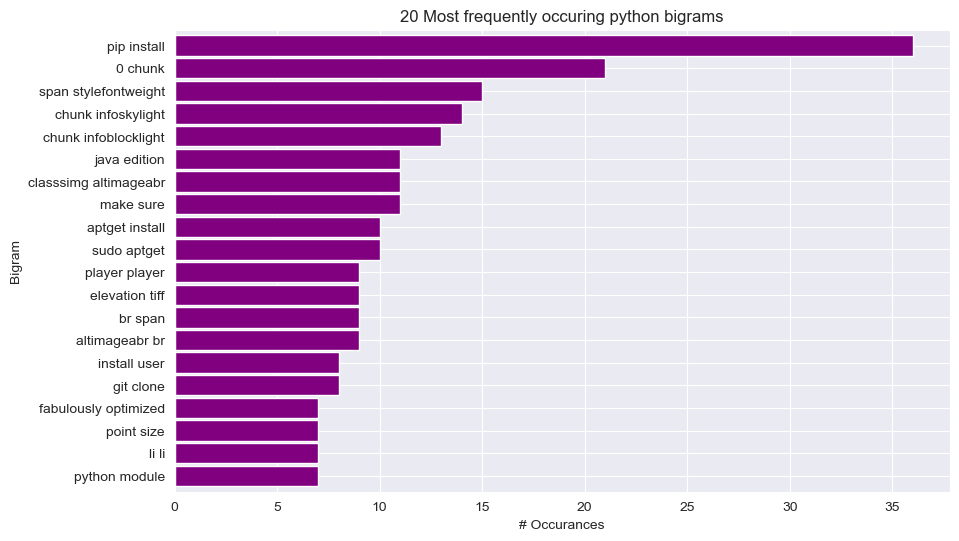

In [248]:
top_20_python_bigrams.sort_values(ascending=True).plot.barh(color='purple', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring python bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_python_bigrams.sort_values(ascending=True).reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)


In [249]:
top_20_java_bigrams

(pull, request)       70
(make, sure)          56
(gradlew, build)      44
(open, source)        32
(source, code)        29
(command, line)       26
(java, jar)           24
(p, aligncenter)      24
(feel, free)          21
(git, clone)          21
(mod, add)            20
(pca, feature)        20
(boolean, pca)        19
(bedrock, edition)    18
(general, license)    18
(download, latest)    18
(open, command)       17
(latest, release)     17
(mod, folder)         17
(please, note)        16
dtype: int64

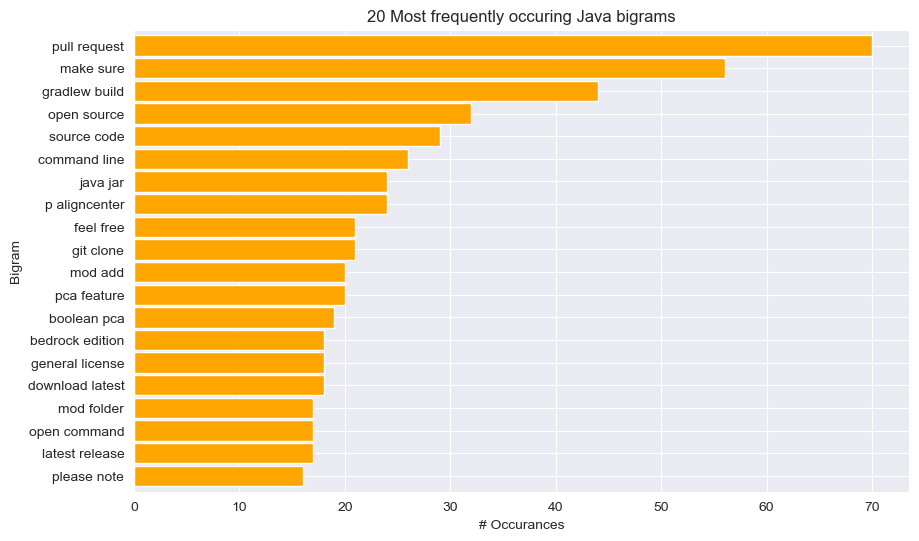

In [250]:
top_20_java_bigrams.sort_values(ascending=True).plot.barh(color='orange', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring Java bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_java_bigrams.sort_values(ascending=True).reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

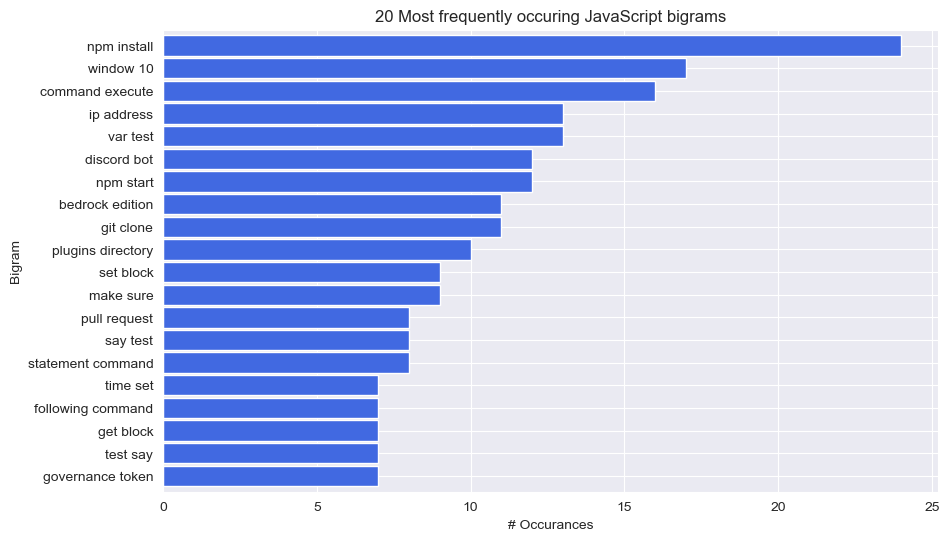

In [252]:
top_20_javascript_bigrams.sort_values(ascending=True).plot.barh(color='royalblue', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring JavaScript bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_javascript_bigrams.sort_values(ascending=True).reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

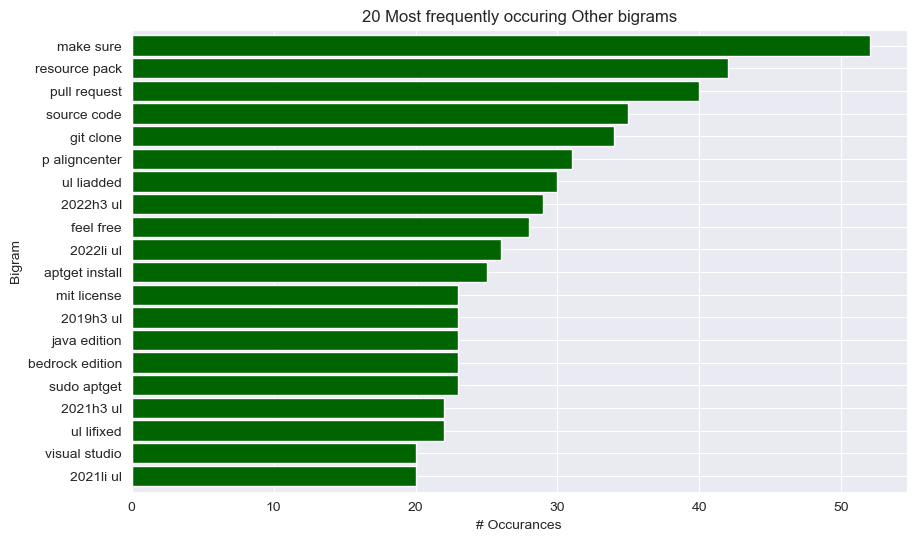

In [253]:
top_20_other_bigrams.sort_values(ascending=True).plot.barh(color='darkgreen', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring Other bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_other_bigrams.sort_values(ascending=True).reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

In [254]:
#Doing top 10 trigrams
top_10_python_trigrams = (pd.Series(nltk.ngrams(python_words, 3))
                      .value_counts()
                      .head(10))

top_10_java_trigrams = (pd.Series(nltk.ngrams(java_words, 3))
                      .value_counts()
                      .head(10))

top_10_javascript_trigrams = (pd.Series(nltk.ngrams(javascript_words, 3))
                      .value_counts()
                      .head(10))

top_10_other_trigrams = (pd.Series(nltk.ngrams(other_words, 3))
                      .value_counts()
                      .head(10))

In [255]:
top_10_python_trigrams

(0, chunk, infoblocklight)              11
(sudo, aptget, install)                 10
(classsimg, altimageabr, br)             9
(0, chunk, infoskylight)                 8
(pip, install, user)                     7
(tool, span, spanbr)                     6
(install, r, requirementstxt)            6
(python, setuppy, develop)               5
(pip, install, r)                        5
(httpmapmajncraftcz, world, surface)     4
dtype: int64

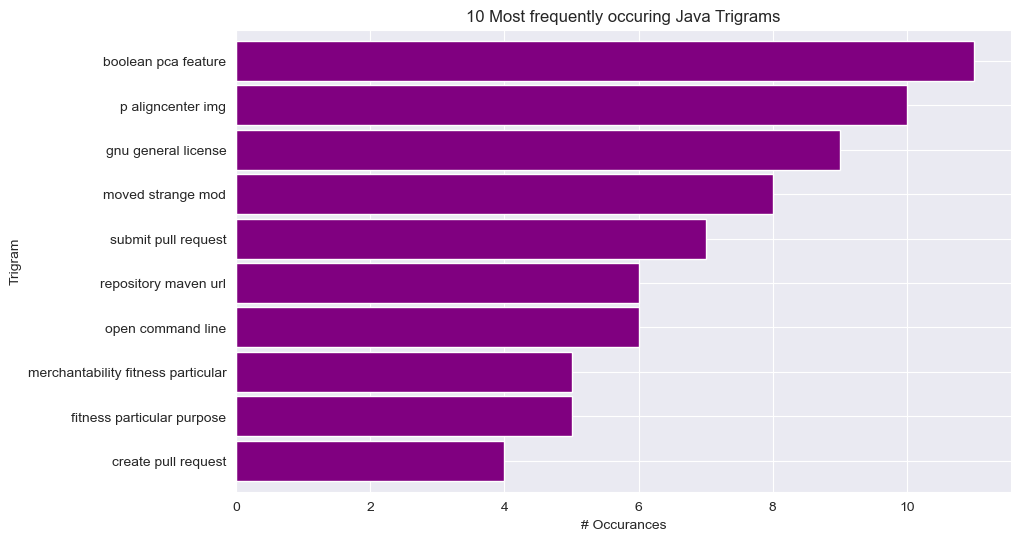

In [256]:
top_10_python_trigrams.sort_values(ascending=True).plot.barh(color='purple', width=.9, figsize=(10, 6))

plt.title('10 Most frequently occuring Java Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_10_java_trigrams.sort_values(ascending=True).reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
_ = plt.yticks(ticks, labels)

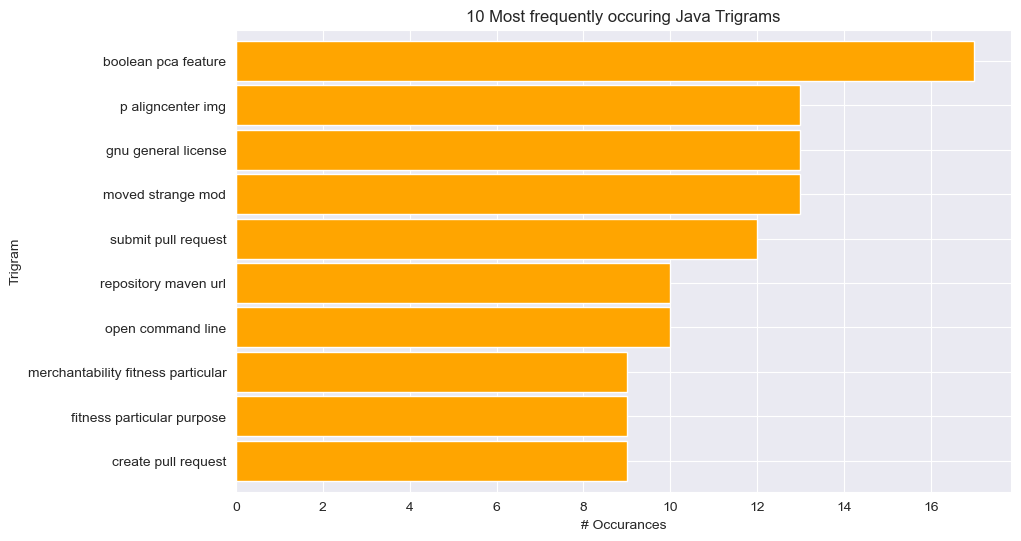

In [257]:
top_10_java_trigrams.sort_values(ascending=True).plot.barh(color='orange', width=.9, figsize=(10, 6))

plt.title('10 Most frequently occuring Java Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_10_java_trigrams.sort_values(ascending=True).reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
_ = plt.yticks(ticks, labels)

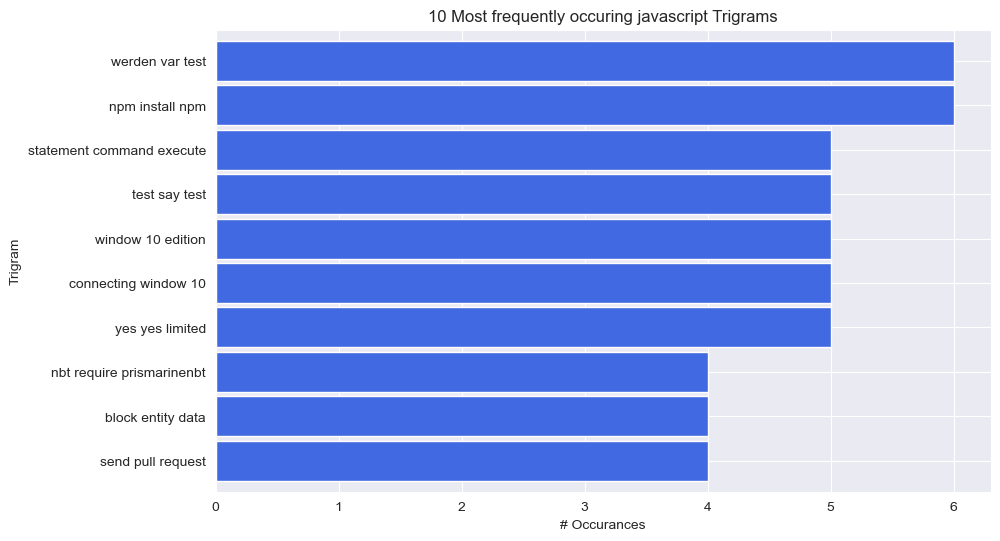

In [258]:
top_10_javascript_trigrams.sort_values(ascending=True).plot.barh(color='royalblue', width=.9, figsize=(10, 6))

plt.title('10 Most frequently occuring javascript Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_10_javascript_trigrams.sort_values(ascending=True).reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
_ = plt.yticks(ticks, labels)

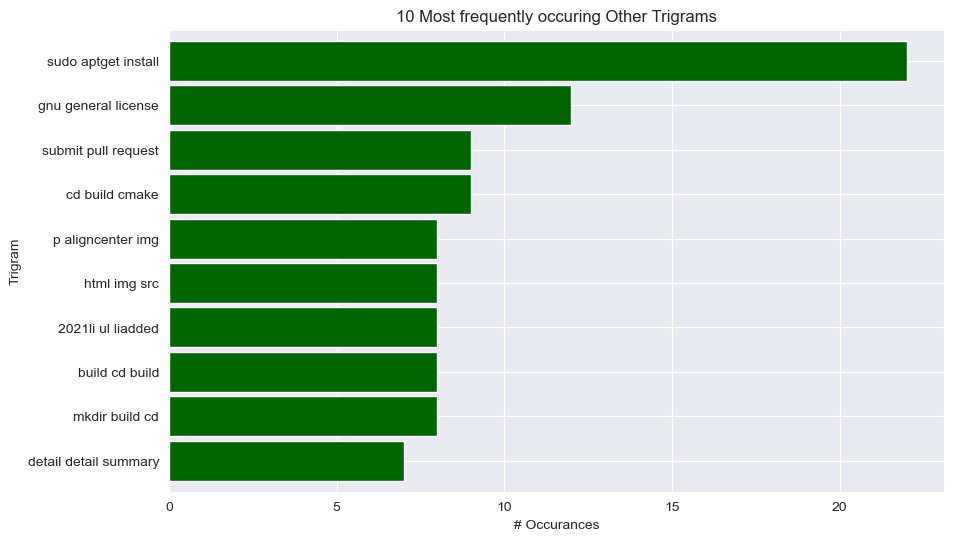

In [259]:
top_10_other_trigrams.sort_values(ascending=True).plot.barh(color='darkgreen', width=.9, figsize=(10, 6))

plt.title('10 Most frequently occuring Other Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_10_other_trigrams.sort_values(ascending=True).reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
_ = plt.yticks(ticks, labels)

## Word Clouds

In [260]:
train_python.head(2)

,repo,language,readme_contents,clean,lemmatized,word_count
612,Mekolaos/Aternos-On-Discord,Python,# Aternos On Discord \n[![Build Status](https:...,aternos discord build statushttpstraviscicomme...,aternos discord build statushttpstraviscicomme...,237
26,Hawstein/PyMinecraft,Python,# Minecraft\n\n这是用Python和Pyglet写的简单的Minecraft游...,pythonpygletminecraft httpsgithubcomfoglemanmi...,pythonpygletminecraft httpsgithubcomfoglemanmi...,37


In [261]:
#Make a series of the top 20 words in the three top languages
top_20_java_words = (pd.Series(java_words).value_counts().head(20))
top_20_python_words = (pd.Series(python_words).value_counts().head(20))
top_20_javascript_words = (pd.Series(javascript_words).value_counts().head(20))

In [262]:
top_20_java_words

mod        525
build      339
use        298
project    245
code       233
player     220
support    194
issue      180
feature    171
command    167
using      164
java       163
forge      162
license    161
make       160
change     160
gradle     159
add        157
source     150
also       148
dtype: int64

In [263]:
top_20_python_words

install    134
python     122
use         89
world       72
0           61
image       61
chunk       59
using       57
make        56
block       55
map         54
span        51
mod         51
1           50
br          49
pip         48
command     47
player      47
name        47
support     46
dtype: int64

In [264]:
top_20_javascript_words

command      153
backup        82
test          74
start         74
say           64
set           64
werden        64
install       61
npm           61
block         61
1             60
using         59
directory     57
und           56
need          55
use           54
mit           54
2             54
player        54
also          54
dtype: int64

In [265]:
#Create a string of those top 20 words
top_20_java_word_string = ' '.join(top_20_java_words)
top_20_python_word_string = ' '.join(top_20_python_words)
top_20_javascript_word_string = ' '.join(top_20_javascript_words)

TypeError: sequence item 0: expected str instance, int found

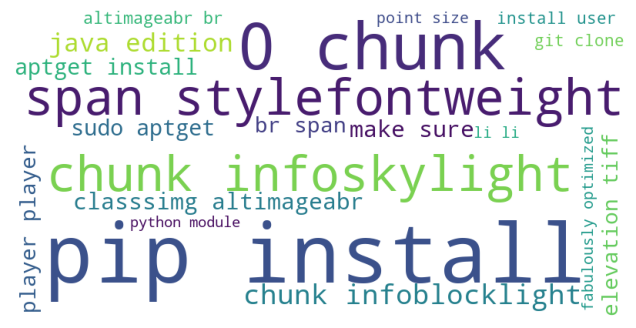

In [266]:
#Python bigrams wordcloud

data = {k[0] + ' ' + k[1]: v for k, v in top_20_python_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()


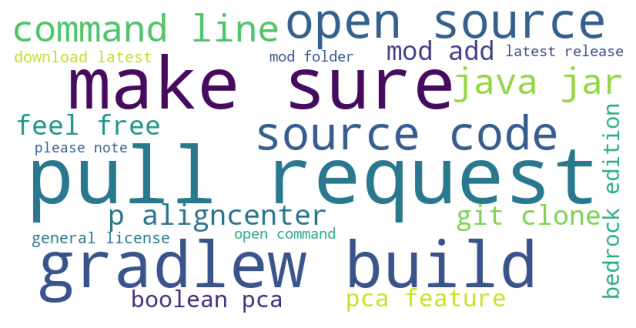

In [267]:
#Java Bigrams wordcloud
data = {k[0] + ' ' + k[1]: v for k, v in top_20_java_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

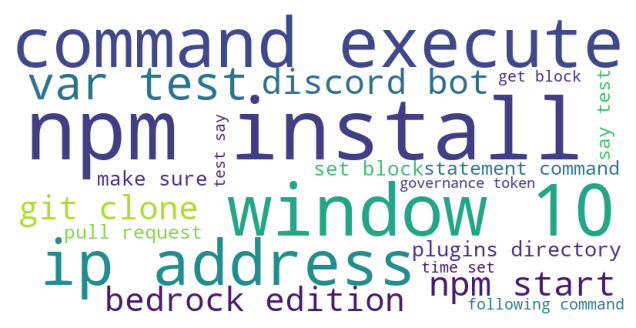

In [268]:
#JavaScript Bigrams wordcloud
data = {k[0] + ' ' + k[1]: v for k, v in top_20_javascript_bigrams.to_dict().items()}
stopwords = set(STOPWORDS)
stopwords.add("minecraft server")
img = WordCloud(stopwords=stopwords, background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [269]:
#python_words.value_counts()
python_topwords = pd.Series(list(python_words)).head(20)

In [270]:
python_topwords

0                                               aternos
1                                               discord
2                                                 build
3     statushttpstraviscicommekolaosjackaditsvgbranc...
4                                                simple
5                                                  tool
6                                                 serve
7                                               discord
8                                                   bot
9                                                manage
10                                              aternos
11                                              discord
12                                              aternos
13                              discordaternosondiscord
14                                              getting
15                                startedgettingstarted
16                                      windowsmaclinux
17                                x64windowsmacl

In [271]:
top_20_python_bigrams

(pip, install)              36
(0, chunk)                  21
(span, stylefontweight)     15
(chunk, infoskylight)       14
(chunk, infoblocklight)     13
(java, edition)             11
(classsimg, altimageabr)    11
(make, sure)                11
(aptget, install)           10
(sudo, aptget)              10
(player, player)             9
(elevation, tiff)            9
(br, span)                   9
(altimageabr, br)            9
(install, user)              8
(git, clone)                 8
(point, size)                7
(li, li)                     7
(fabulously, optimized)      7
(python, module)             7
dtype: int64

In [272]:
'&#9;', "' ", " '", "'",'Minecraft','minecraft','minecraft ',' minecraft','abstract','and','arguments','assert','break','byte','case','char','class',
               'const','continue','default','double','else','enum','extends','false','final','finally','float','for',
               'goto','if','implements','import','in','instanceof','int','interface','long','native','new','null',
               'package','pass','private','protected','public','raise','return','short','static','super','switch',
               'synchronized','this','throw','throws','transient','true','try','void','volatile','while','with',
               'yield', 'http', 'com', 'github', 'www', 'version', 'file'

IndentationError: unexpected indent (3008893256.py, line 2)

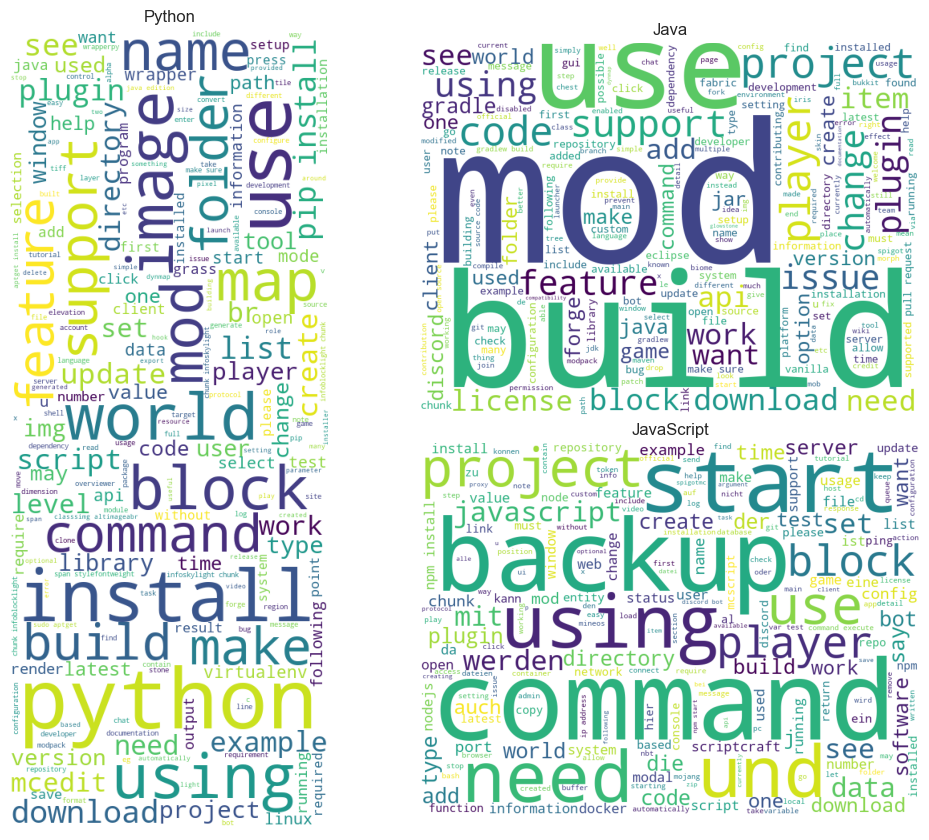

In [273]:
stopwords = set(STOPWORDS)
stopwords.update(['&#9;', "' ", " '", "'",'Minecraft','minecraft','minecraft ',' minecraft','abstract','and','arguments','assert','break','byte','case','char','class',
               'const','continue','default','double','else','enum','extends','false','final','finally','float','for',
               'goto','if','implements','import','in','instanceof','int','interface','long','native','new','null',
               'package','pass','private','protected','public','raise','return','short','static','super','switch',
               'synchronized','this','throw','throws','transient','true','try','void','volatile','while','with',
               'yield', 'http', 'com', 'github', 'www', 'version', 'file'])

python_cloud = WordCloud(background_color='white', height=1000, width=400).generate(' '.join(python_words))
java_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(java_words))
javascript_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(javascript_words))

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(python_cloud)
axs[1].imshow(java_cloud)
axs[2].imshow(javascript_cloud)

axs[0].set_title('Python')
axs[1].set_title('Java')
axs[2].set_title('JavaScript')

for ax in axs: ax.axis('off')


In [274]:
python_words

['aternos',
 'discord',
 'build',
 'statushttpstraviscicommekolaosjackaditsvgbranchmasterhttpstraviscicommekolaosjackadit',
 'simple',
 'tool',
 'serve',
 'discord',
 'bot',
 'manage',
 'aternos',
 'discord',
 'aternos',
 'discordaternosondiscord',
 'getting',
 'startedgettingstarted',
 'windowsmaclinux',
 'x64windowsmaclinuxx64',
 'raspberry',
 'pi',
 'armraspberrypiarm',
 'prerequisitesprerequisites',
 'discord',
 'commandsdiscordcommands',
 'cloud',
 'hosting',
 'notecloudhostingnote',
 'getting',
 'started',
 'windowsmaclinux',
 'x64',
 '1',
 'git',
 'clone',
 'repository',
 '2',
 'install',
 'using',
 'either',
 'copy',
 'paste',
 'execute',
 'command',
 'inside',
 'project',
 'folder',
 'pip',
 'install',
 'r',
 'requirementstxt',
 'alternatively',
 'create',
 'virtual',
 'environment',
 'using',
 'python',
 'venv',
 'venv',
 'source',
 'venvbinactivate',
 'pip',
 'install',
 'r',
 'requirementstxt',
 '3',
 'setup',
 'bot',
 'accounthttpsdiscordpyreadthedocsioenlatestdiscordhtml'

In [275]:
#all_python_readme
#all_java_readme
#all_javascript_readme
#all_other_readme

In [ ]:
#File path to directory
#/Users/crislucin/codeup-data-science/MinecraftNLP

In [276]:
#Write all python text to readme
text_file = open(r'/Users/crislucin/codeup-data-science/MinecraftNLP/all_python_readme.txt', 'w')
text_file.write(all_python_readme)
text_file.close()

In [278]:
#Write all java text to readme
text_file = open(r'/Users/crislucin/codeup-data-science/MinecraftNLP/all_java_readme.txt', 'w')
text_file.write(all_java_readme)
text_file.close()

In [279]:
#Write all javascript text to readme
text_file = open(r'/Users/crislucin/codeup-data-science/MinecraftNLP/all_javascript_readme.txt', 'w')
text_file.write(all_javascript_readme)
text_file.close()

In [280]:
#Write all other text to readme
text_file = open(r'/Users/crislucin/codeup-data-science/MinecraftNLP/all_other_readme.txt', 'w')
text_file.write(all_other_readme)
text_file.close()